In [8]:
import numpy as np 
import pandas as pd 
# import os
import re
import itertools
import unicodedata
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
from matplotlib import pyplot as plt

import nltk
from nltk import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk import bigrams

import collections

In [3]:
# Data Pre-processing ==> done in text pre-processing docs
# Import data 
data = pd.read_csv('dataset/clean_SolanaNFTs_top.csv')
data

,Processed
0,solana based gamefi title genopets partner yie...
1,yield guild good love development
2,must commend genopet team work
3,amazing saw interesting called solajump early ...
4,bitcode art giveaway upvote drop solana addres...
...,...
212,free cool cats solana everyone worth 30 000 up...
213,additional details guarantee win make sure fol...
214,claim free nifty records joining discord
215,3 free giveaway upvote drop address


In [18]:
# tokenise words in each row and put them in a list. create a list of lists
tokenizer = RegexpTokenizer(r'\w+')

reddit_words = []
for reddit_text in data['Processed'].apply(str):
    tokens = tokenizer.tokenize(reddit_text)
    reddit_words.append(tokens)

# from the individual words, create bigrams. This is still in a list of lists
terms_bigram = [list(bigrams(post)) for post in reddit_words]

TypeError: 'list' object is not callable

In [19]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# sort bigrams such that ('a', 'b') and ('b', 'a') can be 
sorted_bigram = [tuple(sorted(i)) for i in bigrams]

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(sorted_bigram)

len(bigram_counts)
# bigram_counts

1734

In [20]:
#Put it into a Dataframe
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['bigram', 'count'])

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [21]:
df = bigram_df.copy()

word1 = []
word2 = []
for i, j in df['bigram']:
    word1.append(i) 
    word2.append(j)
    
df['word1']=word1
df['word2']=word2
df

,bigram,count,word1,word2
0,"(based, solana)",6,based,solana
1,"(based, gamefi)",1,based,gamefi
2,"(gamefi, title)",1,gamefi,title
3,"(genopets, title)",1,genopets,title
4,"(genopets, partner)",1,genopets,partner
...,...,...,...,...
1729,"(joined, sure)",1,joined,sure
1730,"(discord, joined)",1,discord,joined
1731,"(server, verified)",1,server,verified
1732,"(considered, verified)",1,considered,verified


In [22]:
# prepping a gephi 

import networkx as nx

df_network = nx.from_pandas_edgelist(df,source='word1', target='word2', edge_attr=["count"], create_using=nx.DiGraph())
nx.write_graphml(df_network,'try_tweet.graphml') 

In [200]:
# new_dic = {}
# # bigram_counts_1 = bigram_counts.copy()
# # bigram_counts_2 = bigram_counts.copy()

# # for key, index in bigram_counts_1:
# #     for key2, index2 in bigram_counts_2: 
# #         if index == key2 and index2 == key:
# #             new_dic[key, index] = bigram_counts_1[key, index] + bigram_counts_2[key2, index2]
# #             bigram_counts_2.pop(key2, index2)""
# #         else:
# #             new_dic[key, index] = bigram_counts[key, index]

# # bigram_counts_1 = {"a,b": 1}
# # #          ('b', 'g'): 1,
# # #          ('g', 't'): 1,
# # #          ('b', 'a'): 1}

# # bigram_counts_1 = { ('a', 'b'): 1, ('b', 'g'): 1,
# #          ('g', 't'): 1,
# #          ('b', 'a'): 1}
# # # bigram_counts_1

# for key, value in list:
# #     print(key, value)
# #     print(key[0], key[1])
#     newKey = (key[1], key[0])
# #     print(key1, key2)
# #     print(newKey)
#     if key not in new_dic and newKey not in new_dic : 
#         new_dic[key] = value
#     else:
#         new_dic[key] += new_dic[newKey]

# # print(new_dic[newKey])
# #             new_dic.pop(key2, index2)
# new_dic       
        
# # len(new_dic)
# # # len(bigram_counts_2)
# # # for key, index in bigram_counts:
# # #     print(key, index)
# # #     print(bigram_counts[key, index])
    
    
# # # bigram_counts[('solana', 'based')] + bigram_counts[('based', 'solana')]

KeyError: ('b', 'a')

In [252]:
# new_dic = {}
# bigram_counts_1 = bigram_counts.copy()
# bigram_counts_2 = bigram_counts.copy()
# bigram_counts_3 = bigram_counts.copy()

# for A, B in bigram_counts_1:
#     print (A,B)
#     together = A,B
#     opp_together = B,A
# #     print (bigram_counts_1[together])
#     for A2, B2 in bigram_counts_2: 
#         if A == B2 and B == A2:
# #             new_dic[A, B] = bigram_counts_1[A, B] + bigram_counts_2[A2, B2]
#             print(bigram_counts_3[opp_together])
# #             bigram_counts_3.pop(opp_together)
# #             bigram_counts_3.pop(together)
#         elif together in bigram_counts_3 and together not in new_dic: 
# #             new_dic[A, B] = bigram_counts_3[A, B]
# #             print(new_dic[together])
# #             new_dic[A, B] = bigram_counts[A, B]
            
# len(new_dic)
# # len(bigram_counts_3)

solana based
based gamefi
gamefi title
title genopets
genopets partner
partner yield
yield guild
guild games
guild good
good love
love development
must commend
commend genopet
genopet team
team work
amazing saw
saw interesting
interesting called
called solajump
solajump early
early stage
stage moment
bitcode art
art giveaway
giveaway upvote
upvote drop
drop solana
solana address
address giveaway
giveaway mint
mint cash
join discord
discord giveaway
link image
image hi
hi guys
guys managed
managed create
create non
non fungible
fungible token
token solana
solana using
using manual
manual link
image jpeg
jpeg newly
newly minted
minted please
please help
help man
man appreciate
appreciate cheerz
marketplace avg
avg joe
joe artists
artists sol
sol yet
yet seen
seen expensive
expensive curated
curated collections
minting listing
listing stuff
stuff solsea
solsea fill
fill form
form list
list something
something minted
minted possible
possible made
made sale
sale platform
platform theyve
the

In [265]:
# bigram_counts_1 = bigram_counts.copy()
# bigram_counts_2 = bigram_counts.copy()
# for A, B in bigram_counts:
#     together = A,B
#     opp_together = B,A
#     if together and opp_together in bigram_counts:
#         new_dic[A, B] = bigram_counts[A, B] + bigram_counts[B, A]
# #         bigram_counts_1.pop(opp_together)
# #         bigram_counts_1.pop(together)
#         del bigram_counts_1[opp_together]
#         del bigram_counts_1[together]
#     elif together in bigram_counts_1:
#         new_dic[A, B] = bigram_counts_1[A, B]
# # len(bigram_counts)   

1771

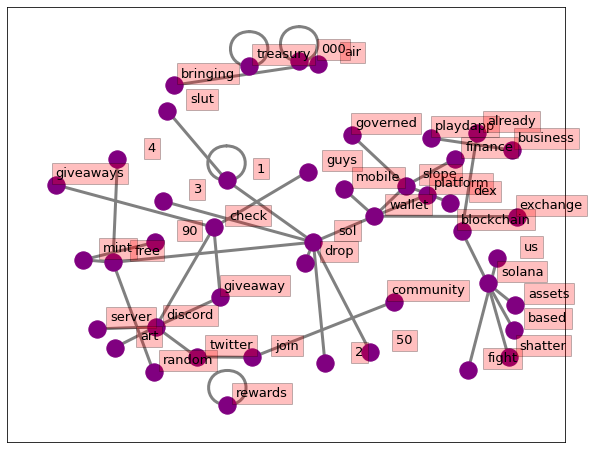

In [89]:
# # Create network plot 
# G = nx.Graph()

# # Create connections between nodes
# for k, v in d[0].items():
#     G.add_edge(k[0], k[1], weight=(v * 10))

# fig, ax = plt.subplots(figsize=(10, 8))

# pos = nx.spring_layout(G, k=2)

# # Plot networks
# nx.draw_networkx(G, pos,
#                  font_size=16,
#                  width=3,
#                  edge_color='grey',
#                  node_color='purple',
#                  with_labels = False,
#                  ax=ax)

# # Create offset labels
# for key, value in pos.items():
#     x, y = value[0]+.135, value[1]+.045
#     ax.text(x, y,
#             s=key,
#             bbox=dict(facecolor='red', alpha=0.25),
#             horizontalalignment='center', fontsize=13)
    
# plt.show()

References:<br> 
https://www.kaggle.com/code/itoeiji/simple-co-occurrence-network/notebook <br>
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/